### Size vs. Quality

In [1]:
import pandas as pd
dataset=pd.read_csv('premier-player-23-24.csv')
dataset.head()

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90,Team
0,Rodri,es ESP,MF,27.0,34,34,2931.0,32.6,8.0,9.0,...,0.28,0.52,0.25,0.52,0.12,0.12,0.24,0.12,0.24,Manchester City
1,Phil Foden,eng ENG,"FW,MF",23.0,35,33,2857.0,31.7,19.0,8.0,...,0.25,0.85,0.60,0.85,0.33,0.26,0.59,0.33,0.59,Manchester City
2,Ederson,br BRA,GK,29.0,33,33,2785.0,30.9,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Manchester City
3,Julián Álvarez,ar ARG,"MF,FW",23.0,36,31,2647.0,29.4,11.0,8.0,...,0.27,0.65,0.31,0.58,0.44,0.22,0.66,0.39,0.61,Manchester City
4,Kyle Walker,eng ENG,DF,33.0,32,30,2767.0,30.7,0.0,4.0,...,0.13,0.13,0.00,0.13,0.01,0.09,0.10,0.01,0.10,Manchester City


#lets analyze and compare expected goals(xG) for:
1. All players(large but Noisy group)
2. Players with > 15 starts means already played more than 15 match as starting XI (Small but Precise)

In [3]:
#make sure column are in correct type
dataset['Starts']=pd.to_numeric(dataset['Starts'],errors='coerce')
dataset['xG']=pd.to_numeric(dataset['xG'],errors='coerce')

In [5]:
import numpy as np
from scipy.stats import t
#finding CI for Player with >15
group_precise=dataset[dataset['Starts']>15]
expected_goal=group_precise['xG'].dropna() #dropna() for handling missing value or nan 
n1=len(expected_goal)
mean1=expected_goal.mean()
std1=expected_goal.std()

#95% CI
ci_1=t.interval(0.95,df=n1-1,loc=mean1,scale=std1/np.sqrt(n1))

print(f"Confidence Interval of Player>20 start:{ci_1}")

Confidence Interval of Player>20 start:(3.257454187382929, 4.365932909391264)


In [7]:
#finding CI for all Player
expected_goal_all=dataset['xG'].dropna()
n2=len(expected_goal_all)
mean2=expected_goal_all.mean()
std2=expected_goal_all.std()

#95% CI
ci_2=t.interval(0.95,df=n2-1,loc=mean2,scale=std2/np.sqrt(n2))

print(f"Confidence Interval of all Player :{ci_2}")

Confidence Interval of all Player :(1.798568596997825, 2.3535003685194162)


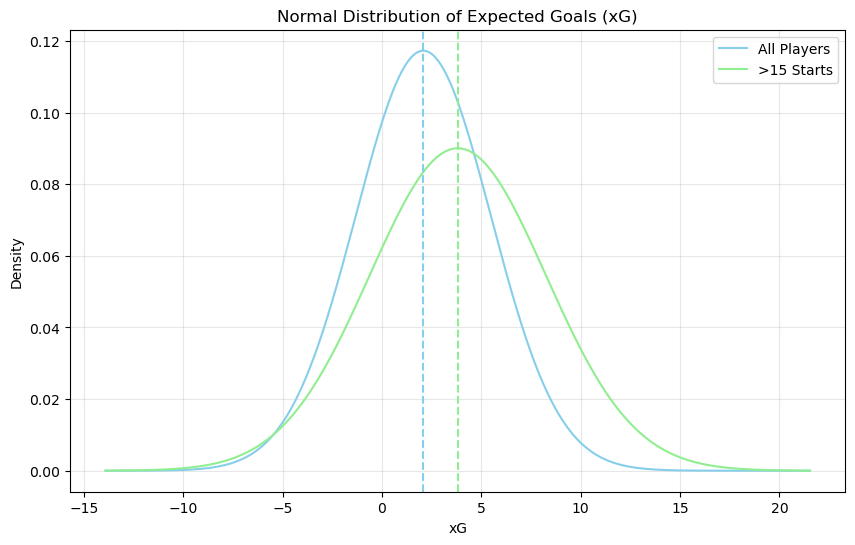

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Values from earlier calculations
mu_all, std_all = mean2, std2
mu_precise, std_precise = mean1, std1

# x-axis range for plotting
x_range = np.linspace(min(mu_all - 4*std_all, mu_precise - 4*std_precise),
                      max(mu_all + 4*std_all, mu_precise + 4*std_precise), 500)

# Normal PDFs
pdf_all = norm.pdf(x_range, mu_all, std_all)
pdf_precise = norm.pdf(x_range, mu_precise, std_precise)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_range, pdf_all, label='All Players', color='skyblue')
plt.plot(x_range, pdf_precise, label='>15 Starts', color='lightgreen')

# Mean indicators
plt.axvline(mu_all, color='skyblue', linestyle='--')
plt.axvline(mu_precise, color='lightgreen', linestyle='--')

# Labels and style
plt.title('Normal Distribution of Expected Goals (xG)')
plt.xlabel('xG')
plt.ylabel('Density')
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('C:/project/draft/Statistics_Project/Sampling_Bias_and_Mean_Reversion_in_Football_Analytics/visuals/Size_Vs_quality.png')
plt.show()



Interpretation:

 Blue Curve (All Players)

- Includes everyone, even with few starts thats means noisy data.

- Taller & narrower: inflated by low xG players with minimal playtime.

- Lower mean, smaller std = misleading due to many near-zero entries.

 Green Curve (>15 Starts)

- Smaller but higher-quality group with meaningful data.

 - Wider curve = real variance in consistent performers.

- Higher mean xG = regular starters contribute more.